In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d andrewmvd/dog-and-cat-detection

100% 1.03G/1.03G [00:09<00:00, 185MB/s]
100% 1.03G/1.03G [00:09<00:00, 121MB/s]


In [6]:
%cd /content/drive/MyDrive/fly_ai/3주차/cat_dog_detection

/content/drive/MyDrive/fly_ai/3주차/cat_dog_detection


In [7]:
!unzip -q /content/dog-and-cat-detection.zip

In [8]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [16]:
img_path = '/content/drive/MyDrive/fly_ai/3주차/cat_dog_detection/images'
label_path = '/content/drive/MyDrive/fly_ai/3주차/cat_dog_detection/annotations'

In [17]:
img_list = sorted(glob.glob(img_path+'/*'))
annot_list = sorted(glob.glob(label_path+'/*'))

In [18]:
print(len(img_list))
print(len(annot_list))

3686
3686


In [19]:
img_list[1]

'/content/drive/MyDrive/fly_ai/3주차/cat_dog_detection/images/Cats_Test1.png'

In [12]:
## 바운딩 박스 시각화 함수 정의

def generate_box(obj):

    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target

def plot_image(img_path, annotation):

    img = mpimg.imread(img_path)

    fig,ax = plt.subplots(1)
    ax.imshow(img)


    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        elif annotation['labels'][idx] == 1 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [20]:
img_list.index(img_path+'/Cats_Test1.png')

1

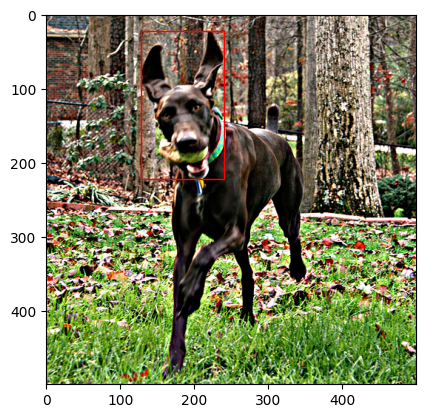

In [22]:
bbox = generate_target(annot_list[1])
plot_image(img_list[1], bbox)

In [23]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection
!unzip -q Face\ Mask\ Detection.zip

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (45/45), 11.62 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Downloading...
From: https://drive.google.com/uc?id=16Gzn1w38yZLJpzmzKcRIRveFeHZtCEr7
To: /content/drive/MyDrive/fly_ai/3주차/cat_dog_detection/Face Mask Detection.zip
100% 417M/417M [00:05<00:00, 82.7MB/s]
Face Mask Detection.zip download complete!
